<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd

In [3]:
pd.read_csv(r'../../data/flights.csv',low_memory=False)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'../../data/flights.csv')
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(train,y_train)

auc(model, train, test)

In [1]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
boston_d = load_boston()
boston = pd.DataFrame(boston_d.data, columns=boston_d.feature_names)

In [2]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [3]:
boston_f = pd.DataFrame(boston_d.data, columns=boston_d.feature_names)
boston_t = pd.DataFrame(boston_d.target, columns=['MEDV'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(boston_f, boston_t, test_size = 0.2, random_state=5)

In [8]:
pd.DataFrame(boston_d.data, columns=boston_d.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [10]:
model = cb.CatBoostRegressor(loss_function='RMSE')


In [11]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 23.9109759	test: 23.3747443	best: 23.3747443 (0)	total: 51.7ms	remaining: 5.12s
1:	learn: 23.2999199	test: 22.7526895	best: 22.7526895 (1)	total: 52.2ms	remaining: 2.56s
2:	learn: 22.7063969	test: 22.1298297	best: 22.1298297 (2)	total: 52.7ms	remaining: 1.7s
3:	learn: 22.0904045	test: 21.4745540	best: 21.4745540 (3)	total: 53ms	remaining: 1.27s
4:	learn: 21.4975439	test: 20.8393774	best: 20.8393774 (4)	total: 53.3ms	remaining: 1.01s
5:	learn: 20.9159902	test: 20.2166454	best: 20.2166454 (5)	total: 53.7ms	remaining: 841ms
6:	learn: 20.3631449	test: 19.6240476	best: 19.6240476 (6)	total: 54.1ms	remaining: 719ms
7:	learn: 19.8277044	test: 19.0775839	best: 19.0775839 (7)	total: 54.5ms	remaining: 627ms
8:	learn: 19.3258935	test: 18.5427044	best: 18.5427044 (8)	total: 55ms	remaining: 556ms
9:	learn: 18.8503317	test: 18.0213829	best: 18.0213829 (9)	total: 55.3ms	remaining: 498ms
10:	learn: 18.3857863	test: 17.5312836	best: 17.5312836 (10)	total: 55.6ms	remaining: 450ms
11:	learn: 17

77:	learn: 5.5645477	test: 3.7353574	best: 3.7353574 (77)	total: 20.3ms	remaining: 5.72ms
78:	learn: 5.5109354	test: 3.6954660	best: 3.6954660 (78)	total: 20.5ms	remaining: 5.45ms
79:	learn: 5.4415537	test: 3.6505638	best: 3.6505638 (79)	total: 20.8ms	remaining: 5.19ms
80:	learn: 5.3831726	test: 3.5990349	best: 3.5990349 (80)	total: 21ms	remaining: 4.92ms
81:	learn: 5.3277609	test: 3.5548608	best: 3.5548608 (81)	total: 21.2ms	remaining: 4.66ms
82:	learn: 5.2745983	test: 3.4935868	best: 3.4935868 (82)	total: 21.5ms	remaining: 4.4ms
83:	learn: 5.2277038	test: 3.4522348	best: 3.4522348 (83)	total: 21.7ms	remaining: 4.14ms
84:	learn: 5.1897497	test: 3.4173010	best: 3.4173010 (84)	total: 22ms	remaining: 3.88ms
85:	learn: 5.1424621	test: 3.3618714	best: 3.3618714 (85)	total: 22.2ms	remaining: 3.62ms
86:	learn: 5.1081778	test: 3.3203553	best: 3.3203553 (86)	total: 22.5ms	remaining: 3.35ms
87:	learn: 5.0723472	test: 3.2814831	best: 3.2814831 (87)	total: 22.7ms	remaining: 3.1ms
88:	learn: 5.026

68:	learn: 2.9778318	test: 2.3935283	best: 2.3935283 (68)	total: 16.4ms	remaining: 19.2ms
69:	learn: 2.9630489	test: 2.3965518	best: 2.3935283 (68)	total: 16.7ms	remaining: 19ms
70:	learn: 2.9383328	test: 2.4088594	best: 2.3935283 (68)	total: 16.9ms	remaining: 18.8ms
71:	learn: 2.9254051	test: 2.4059838	best: 2.3935283 (68)	total: 17.2ms	remaining: 18.6ms
72:	learn: 2.9108985	test: 2.4034002	best: 2.3935283 (68)	total: 17.4ms	remaining: 18.4ms
73:	learn: 2.8974998	test: 2.4071224	best: 2.3935283 (68)	total: 17.7ms	remaining: 18.2ms
74:	learn: 2.8799350	test: 2.4049584	best: 2.3935283 (68)	total: 17.9ms	remaining: 17.9ms
75:	learn: 2.8661640	test: 2.3997434	best: 2.3935283 (68)	total: 18.2ms	remaining: 17.7ms
76:	learn: 2.8490572	test: 2.4066051	best: 2.3935283 (68)	total: 18.5ms	remaining: 17.5ms
77:	learn: 2.8346926	test: 2.3983503	best: 2.3935283 (68)	total: 18.8ms	remaining: 17.3ms
78:	learn: 2.8233294	test: 2.3896394	best: 2.3896394 (78)	total: 19.1ms	remaining: 17.1ms
79:	learn: 2

16:	learn: 6.9520662	test: 5.1868327	best: 5.1868327 (16)	total: 4.08ms	remaining: 31.9ms
17:	learn: 6.6014902	test: 4.7798582	best: 4.7798582 (17)	total: 4.31ms	remaining: 31.6ms
18:	learn: 6.3827413	test: 4.4872867	best: 4.4872867 (18)	total: 4.54ms	remaining: 31.3ms
19:	learn: 6.1234262	test: 4.1694972	best: 4.1694972 (19)	total: 4.79ms	remaining: 31.1ms
20:	learn: 5.8686348	test: 3.8969548	best: 3.8969548 (20)	total: 5.03ms	remaining: 30.9ms
21:	learn: 5.6440468	test: 3.6895379	best: 3.6895379 (21)	total: 5.26ms	remaining: 30.6ms
22:	learn: 5.4528028	test: 3.5174348	best: 3.5174348 (22)	total: 5.54ms	remaining: 30.6ms
23:	learn: 5.3016225	test: 3.4087379	best: 3.4087379 (23)	total: 5.8ms	remaining: 30.4ms
24:	learn: 5.1999601	test: 3.2964441	best: 3.2964441 (24)	total: 6.04ms	remaining: 30.2ms
25:	learn: 4.9998985	test: 3.1833694	best: 3.1833694 (25)	total: 6.31ms	remaining: 30.1ms
26:	learn: 4.8233423	test: 3.1225502	best: 3.1225502 (26)	total: 6.55ms	remaining: 29.8ms
27:	learn: 

113:	learn: 4.1977543	test: 2.7243004	best: 2.7243004 (113)	total: 27.4ms	remaining: 20.7ms
114:	learn: 4.1802172	test: 2.7116303	best: 2.7116303 (114)	total: 27.6ms	remaining: 20.4ms
115:	learn: 4.1617169	test: 2.6969886	best: 2.6969886 (115)	total: 27.8ms	remaining: 20.2ms
116:	learn: 4.1362302	test: 2.6920114	best: 2.6920114 (116)	total: 28.1ms	remaining: 19.9ms
117:	learn: 4.1103231	test: 2.6867479	best: 2.6867479 (117)	total: 28.3ms	remaining: 19.7ms
118:	learn: 4.0980295	test: 2.6769599	best: 2.6769599 (118)	total: 28.6ms	remaining: 19.4ms
119:	learn: 4.0590032	test: 2.6703458	best: 2.6703458 (119)	total: 28.8ms	remaining: 19.2ms
120:	learn: 4.0357138	test: 2.6489648	best: 2.6489648 (120)	total: 29ms	remaining: 19ms
121:	learn: 4.0186698	test: 2.6441436	best: 2.6441436 (121)	total: 29.3ms	remaining: 18.7ms
122:	learn: 4.0007725	test: 2.6263843	best: 2.6263843 (122)	total: 29.5ms	remaining: 18.5ms
123:	learn: 3.9852615	test: 2.6299446	best: 2.6263843 (122)	total: 29.8ms	remaining:

65:	learn: 3.0333665	test: 2.5879714	best: 2.5879714 (65)	total: 15.8ms	remaining: 32.2ms
66:	learn: 3.0157605	test: 2.5858954	best: 2.5858954 (66)	total: 16.1ms	remaining: 31.9ms
67:	learn: 3.0027849	test: 2.5784892	best: 2.5784892 (67)	total: 16.3ms	remaining: 31.6ms
68:	learn: 2.9849732	test: 2.5882069	best: 2.5784892 (67)	total: 16.5ms	remaining: 31.4ms
69:	learn: 2.9678486	test: 2.5711953	best: 2.5711953 (69)	total: 16.8ms	remaining: 31.2ms
70:	learn: 2.9467912	test: 2.5734911	best: 2.5711953 (69)	total: 17ms	remaining: 30.9ms
71:	learn: 2.9328884	test: 2.5650629	best: 2.5650629 (71)	total: 17.3ms	remaining: 30.7ms
72:	learn: 2.9150434	test: 2.5589000	best: 2.5589000 (72)	total: 17.5ms	remaining: 30.5ms
73:	learn: 2.9025158	test: 2.5636371	best: 2.5589000 (72)	total: 17.8ms	remaining: 30.3ms
74:	learn: 2.8906423	test: 2.5648448	best: 2.5589000 (72)	total: 18ms	remaining: 30ms
75:	learn: 2.8712371	test: 2.5678695	best: 2.5589000 (72)	total: 18.3ms	remaining: 29.8ms
76:	learn: 2.857

14:	learn: 16.8574758	test: 15.8903445	best: 15.8903445 (14)	total: 3.67ms	remaining: 45.3ms
15:	learn: 16.4316359	test: 15.4419069	best: 15.4419069 (15)	total: 3.91ms	remaining: 45ms
16:	learn: 16.0612000	test: 15.0326860	best: 15.0326860 (16)	total: 4.14ms	remaining: 44.6ms
17:	learn: 15.6836790	test: 14.6231093	best: 14.6231093 (17)	total: 4.4ms	remaining: 44.5ms
18:	learn: 15.3381394	test: 14.2435839	best: 14.2435839 (18)	total: 4.64ms	remaining: 44.2ms
19:	learn: 14.9641419	test: 13.8383267	best: 13.8383267 (19)	total: 4.88ms	remaining: 43.9ms
20:	learn: 14.6558577	test: 13.5093855	best: 13.5093855 (20)	total: 5.13ms	remaining: 43.7ms
21:	learn: 14.3258440	test: 13.1301890	best: 13.1301890 (21)	total: 5.41ms	remaining: 43.8ms
22:	learn: 14.0005378	test: 12.7973452	best: 12.7973452 (22)	total: 5.65ms	remaining: 43.5ms
23:	learn: 13.6907928	test: 12.4729024	best: 12.4729024 (23)	total: 5.88ms	remaining: 43.1ms
24:	learn: 13.4018922	test: 12.1540980	best: 12.1540980 (24)	total: 6.12m

16:	learn: 6.1863498	test: 4.6375548	best: 4.6375548 (16)	total: 6.99ms	remaining: 34.1ms
17:	learn: 5.8112334	test: 4.2204654	best: 4.2204654 (17)	total: 7.39ms	remaining: 33.7ms
18:	learn: 5.3872858	test: 3.9184128	best: 3.9184128 (18)	total: 7.79ms	remaining: 33.2ms
19:	learn: 5.1222249	test: 3.6778566	best: 3.6778566 (19)	total: 8.19ms	remaining: 32.8ms
20:	learn: 4.8382323	test: 3.4400323	best: 3.4400323 (20)	total: 8.58ms	remaining: 32.3ms
21:	learn: 4.6092748	test: 3.2419444	best: 3.2419444 (21)	total: 8.98ms	remaining: 31.8ms
22:	learn: 4.3581975	test: 3.0817648	best: 3.0817648 (22)	total: 9.4ms	remaining: 31.5ms
23:	learn: 4.1824862	test: 2.9375335	best: 2.9375335 (23)	total: 9.79ms	remaining: 31ms
24:	learn: 4.0305318	test: 2.8854503	best: 2.8854503 (24)	total: 10.3ms	remaining: 30.8ms
25:	learn: 3.8611277	test: 2.7839915	best: 2.7839915 (25)	total: 10.6ms	remaining: 30.3ms
26:	learn: 3.7274400	test: 2.6861715	best: 2.6861715 (26)	total: 11.1ms	remaining: 30ms
27:	learn: 3.59

89:	learn: 4.2474232	test: 2.9373988	best: 2.9373988 (89)	total: 35.1ms	remaining: 3.9ms
90:	learn: 4.2038989	test: 2.9101062	best: 2.9101062 (90)	total: 35.5ms	remaining: 3.51ms
91:	learn: 4.1682558	test: 2.8790428	best: 2.8790428 (91)	total: 35.9ms	remaining: 3.12ms
92:	learn: 4.1250051	test: 2.8484920	best: 2.8484920 (92)	total: 36.3ms	remaining: 2.73ms
93:	learn: 4.0916358	test: 2.8280357	best: 2.8280357 (93)	total: 36.7ms	remaining: 2.35ms
94:	learn: 4.0634307	test: 2.8031689	best: 2.8031689 (94)	total: 37.2ms	remaining: 1.96ms
95:	learn: 4.0319541	test: 2.7843711	best: 2.7843711 (95)	total: 37.6ms	remaining: 1.56ms
96:	learn: 3.9842671	test: 2.7545266	best: 2.7545266 (96)	total: 38ms	remaining: 1.17ms
97:	learn: 3.9386840	test: 2.7335837	best: 2.7335837 (97)	total: 38.4ms	remaining: 783us
98:	learn: 3.9033225	test: 2.7200055	best: 2.7200055 (98)	total: 38.8ms	remaining: 391us
99:	learn: 3.8734686	test: 2.6995888	best: 2.6995888 (99)	total: 39.2ms	remaining: 0us

bestTest = 2.6995

60:	learn: 6.0378287	test: 4.5725510	best: 4.5725510 (60)	total: 23.9ms	remaining: 34.9ms
61:	learn: 5.9195620	test: 4.4650201	best: 4.4650201 (61)	total: 24.3ms	remaining: 34.5ms
62:	learn: 5.8253845	test: 4.3674706	best: 4.3674706 (62)	total: 24.7ms	remaining: 34.1ms
63:	learn: 5.7157638	test: 4.2737102	best: 4.2737102 (63)	total: 25.1ms	remaining: 33.7ms
64:	learn: 5.6366454	test: 4.1798862	best: 4.1798862 (64)	total: 25.6ms	remaining: 33.5ms
65:	learn: 5.5478617	test: 4.0946626	best: 4.0946626 (65)	total: 26ms	remaining: 33.1ms
66:	learn: 5.4606353	test: 4.0109824	best: 4.0109824 (66)	total: 26.4ms	remaining: 32.7ms
67:	learn: 5.3620907	test: 3.9359698	best: 3.9359698 (67)	total: 26.8ms	remaining: 32.3ms
68:	learn: 5.2797224	test: 3.8562706	best: 3.8562706 (68)	total: 27.2ms	remaining: 31.9ms
69:	learn: 5.2055406	test: 3.7719538	best: 3.7719538 (69)	total: 27.6ms	remaining: 31.5ms
70:	learn: 5.1169847	test: 3.7026736	best: 3.7026736 (70)	total: 28ms	remaining: 31.1ms
71:	learn: 5.0

135:	learn: 2.9646038	test: 2.4128250	best: 2.4128250 (135)	total: 54ms	remaining: 5.56ms
136:	learn: 2.9534681	test: 2.4113793	best: 2.4113793 (136)	total: 54.4ms	remaining: 5.16ms
137:	learn: 2.9398417	test: 2.4105848	best: 2.4105848 (137)	total: 54.8ms	remaining: 4.77ms
138:	learn: 2.9291047	test: 2.4094228	best: 2.4094228 (138)	total: 55.3ms	remaining: 4.37ms
139:	learn: 2.9165476	test: 2.4090935	best: 2.4090935 (139)	total: 55.7ms	remaining: 3.98ms
140:	learn: 2.8946673	test: 2.4006473	best: 2.4006473 (140)	total: 56.1ms	remaining: 3.58ms
141:	learn: 2.8832051	test: 2.3981870	best: 2.3981870 (141)	total: 56.5ms	remaining: 3.19ms
142:	learn: 2.8738167	test: 2.3991560	best: 2.3981870 (141)	total: 57ms	remaining: 2.79ms
143:	learn: 2.8627015	test: 2.3969793	best: 2.3969793 (143)	total: 57.4ms	remaining: 2.39ms
144:	learn: 2.8522934	test: 2.3970050	best: 2.3969793 (143)	total: 57.8ms	remaining: 1.99ms
145:	learn: 2.8419066	test: 2.3943933	best: 2.3943933 (145)	total: 58.2ms	remaining:

52:	learn: 2.5802493	test: 2.3040589	best: 2.3040589 (52)	total: 20.7ms	remaining: 37.9ms
53:	learn: 2.5400670	test: 2.2980984	best: 2.2980984 (53)	total: 21.1ms	remaining: 37.5ms
54:	learn: 2.4995600	test: 2.2774413	best: 2.2774413 (54)	total: 21.6ms	remaining: 37.2ms
55:	learn: 2.4795189	test: 2.2806473	best: 2.2774413 (54)	total: 22ms	remaining: 36.9ms
56:	learn: 2.4610651	test: 2.2798743	best: 2.2774413 (54)	total: 22.5ms	remaining: 36.7ms
57:	learn: 2.4379809	test: 2.2712056	best: 2.2712056 (57)	total: 22.9ms	remaining: 36.3ms
58:	learn: 2.4131266	test: 2.2626708	best: 2.2626708 (58)	total: 23.3ms	remaining: 36ms
59:	learn: 2.3803250	test: 2.2679305	best: 2.2626708 (58)	total: 23.7ms	remaining: 35.6ms
60:	learn: 2.3524009	test: 2.2682833	best: 2.2626708 (58)	total: 24.2ms	remaining: 35.3ms
61:	learn: 2.3328118	test: 2.2694992	best: 2.2626708 (58)	total: 24.6ms	remaining: 34.9ms
62:	learn: 2.3171963	test: 2.2670919	best: 2.2626708 (58)	total: 25ms	remaining: 34.5ms
63:	learn: 2.300

110:	learn: 1.9981326	test: 2.3197885	best: 2.3092905 (104)	total: 43.8ms	remaining: 15.4ms
111:	learn: 1.9881260	test: 2.3157604	best: 2.3092905 (104)	total: 44.2ms	remaining: 15ms
112:	learn: 1.9728708	test: 2.3111991	best: 2.3092905 (104)	total: 44.5ms	remaining: 14.6ms
113:	learn: 1.9604082	test: 2.3117418	best: 2.3092905 (104)	total: 45ms	remaining: 14.2ms
114:	learn: 1.9483181	test: 2.3060295	best: 2.3060295 (114)	total: 45.4ms	remaining: 13.8ms
115:	learn: 1.9351401	test: 2.3044256	best: 2.3044256 (115)	total: 45.9ms	remaining: 13.4ms
116:	learn: 1.9227998	test: 2.3030048	best: 2.3030048 (116)	total: 46.2ms	remaining: 13ms
117:	learn: 1.9082287	test: 2.3048580	best: 2.3030048 (116)	total: 46.6ms	remaining: 12.6ms
118:	learn: 1.8971500	test: 2.2918347	best: 2.2918347 (118)	total: 47ms	remaining: 12.3ms
119:	learn: 1.8854102	test: 2.2936650	best: 2.2918347 (118)	total: 47.4ms	remaining: 11.9ms
120:	learn: 1.8815829	test: 2.2911512	best: 2.2911512 (120)	total: 47.8ms	remaining: 11.

134:	learn: 1.3952666	test: 2.2947360	best: 2.2833036 (131)	total: 52.4ms	remaining: 25.2ms
135:	learn: 1.3904064	test: 2.2936521	best: 2.2833036 (131)	total: 52.9ms	remaining: 24.9ms
136:	learn: 1.3800408	test: 2.2981147	best: 2.2833036 (131)	total: 53.3ms	remaining: 24.5ms
137:	learn: 1.3767793	test: 2.2999046	best: 2.2833036 (131)	total: 53.7ms	remaining: 24.1ms
138:	learn: 1.3679222	test: 2.2995779	best: 2.2833036 (131)	total: 54.1ms	remaining: 23.8ms
139:	learn: 1.3645393	test: 2.2990137	best: 2.2833036 (131)	total: 54.6ms	remaining: 23.4ms
140:	learn: 1.3571675	test: 2.2984700	best: 2.2833036 (131)	total: 55.1ms	remaining: 23ms
141:	learn: 1.3514382	test: 2.2952360	best: 2.2833036 (131)	total: 55.6ms	remaining: 22.7ms
142:	learn: 1.3421513	test: 2.2942281	best: 2.2833036 (131)	total: 56.1ms	remaining: 22.3ms
143:	learn: 1.3356190	test: 2.2914251	best: 2.2833036 (131)	total: 56.5ms	remaining: 22ms
144:	learn: 1.3293122	test: 2.2930510	best: 2.2833036 (131)	total: 57ms	remaining: 2

102:	learn: 1.6930779	test: 2.1541844	best: 2.1186141 (88)	total: 41.7ms	remaining: 39.3ms
103:	learn: 1.6822296	test: 2.1643140	best: 2.1186141 (88)	total: 42.1ms	remaining: 38.9ms
104:	learn: 1.6715202	test: 2.1619636	best: 2.1186141 (88)	total: 42.5ms	remaining: 38.5ms
105:	learn: 1.6683231	test: 2.1628269	best: 2.1186141 (88)	total: 42.9ms	remaining: 38ms
106:	learn: 1.6609677	test: 2.1614760	best: 2.1186141 (88)	total: 43.4ms	remaining: 37.7ms
107:	learn: 1.6519538	test: 2.1614538	best: 2.1186141 (88)	total: 43.8ms	remaining: 37.3ms
108:	learn: 1.6401082	test: 2.1712009	best: 2.1186141 (88)	total: 44.2ms	remaining: 36.9ms
109:	learn: 1.6322368	test: 2.1810361	best: 2.1186141 (88)	total: 44.6ms	remaining: 36.5ms
110:	learn: 1.6196838	test: 2.1876654	best: 2.1186141 (88)	total: 45ms	remaining: 36.1ms
111:	learn: 1.6116048	test: 2.1899820	best: 2.1186141 (88)	total: 45.4ms	remaining: 35.6ms
112:	learn: 1.5974818	test: 2.1846481	best: 2.1186141 (88)	total: 45.7ms	remaining: 35.2ms
113

25:	learn: 4.1820244	test: 2.8762613	best: 2.8762613 (25)	total: 10.5ms	remaining: 70ms
26:	learn: 4.0265040	test: 2.7761367	best: 2.7761367 (26)	total: 10.9ms	remaining: 69.6ms
27:	learn: 3.8764073	test: 2.6774093	best: 2.6774093 (27)	total: 11.3ms	remaining: 69.1ms
28:	learn: 3.7612688	test: 2.6010585	best: 2.6010585 (28)	total: 11.7ms	remaining: 68.9ms
29:	learn: 3.6549209	test: 2.5689767	best: 2.5689767 (29)	total: 12.1ms	remaining: 68.6ms
30:	learn: 3.5581156	test: 2.5642668	best: 2.5642668 (30)	total: 12.5ms	remaining: 68.2ms
31:	learn: 3.4677242	test: 2.5396853	best: 2.5396853 (31)	total: 12.9ms	remaining: 67.9ms
32:	learn: 3.4064902	test: 2.5013224	best: 2.5013224 (32)	total: 13.3ms	remaining: 67.5ms
33:	learn: 3.3380645	test: 2.4652007	best: 2.4652007 (33)	total: 13.8ms	remaining: 67.6ms
34:	learn: 3.2774121	test: 2.4385832	best: 2.4385832 (34)	total: 14.3ms	remaining: 67.3ms
35:	learn: 3.2334803	test: 2.4228826	best: 2.4228826 (35)	total: 14.7ms	remaining: 66.9ms
36:	learn: 3

1:	learn: 20.6050921	test: 19.9685202	best: 19.9685202 (1)	total: 996us	remaining: 98.7ms
2:	learn: 18.9381444	test: 18.2130774	best: 18.2130774 (2)	total: 1.41ms	remaining: 92.5ms
3:	learn: 17.4520937	test: 16.6843473	best: 16.6843473 (3)	total: 1.8ms	remaining: 88.5ms
4:	learn: 16.0975288	test: 15.2253797	best: 15.2253797 (4)	total: 2.27ms	remaining: 88.7ms
5:	learn: 14.8723042	test: 13.8560505	best: 13.8560505 (5)	total: 2.72ms	remaining: 87.9ms
6:	learn: 13.7815206	test: 12.6716049	best: 12.6716049 (6)	total: 3.11ms	remaining: 85.7ms
7:	learn: 12.7428742	test: 11.5364669	best: 11.5364669 (7)	total: 3.51ms	remaining: 84.2ms
8:	learn: 11.7858588	test: 10.4691760	best: 10.4691760 (8)	total: 3.91ms	remaining: 83.1ms
9:	learn: 11.0352233	test: 9.6085520	best: 9.6085520 (9)	total: 4.32ms	remaining: 82ms
10:	learn: 10.3520468	test: 8.8637189	best: 8.8637189 (10)	total: 4.71ms	remaining: 81ms
11:	learn: 9.7239635	test: 8.2132255	best: 8.2132255 (11)	total: 5.11ms	remaining: 80ms
12:	learn:

96:	learn: 3.2649740	test: 2.9971327	best: 2.9971327 (96)	total: 78.3ms	remaining: 2.42ms
97:	learn: 3.2311440	test: 2.9784590	best: 2.9784590 (97)	total: 79.1ms	remaining: 1.61ms
98:	learn: 3.2008014	test: 2.9530439	best: 2.9530439 (98)	total: 80ms	remaining: 808us
99:	learn: 3.1654516	test: 2.9233312	best: 2.9233312 (99)	total: 80.9ms	remaining: 0us

bestTest = 2.923331192
bestIteration = 99

48:	loss: 2.9233312	best: 2.1186141 (27)	total: 3.24s	remaining: 3.11s
0:	learn: 22.3350610	test: 21.8027410	best: 21.8027410 (0)	total: 1.05ms	remaining: 104ms
1:	learn: 20.3102538	test: 19.6794770	best: 19.6794770 (1)	total: 1.62ms	remaining: 79.5ms
2:	learn: 18.4552165	test: 17.7947473	best: 17.7947473 (2)	total: 2.45ms	remaining: 79.2ms
3:	learn: 16.8084895	test: 16.0364353	best: 16.0364353 (3)	total: 3.28ms	remaining: 78.7ms
4:	learn: 15.3170801	test: 14.4965907	best: 14.4965907 (4)	total: 4.08ms	remaining: 77.5ms
5:	learn: 13.9589472	test: 13.1523173	best: 13.1523173 (5)	total: 4.89ms	rema

1:	learn: 20.3888358	test: 19.7704934	best: 19.7704934 (1)	total: 3.12ms	remaining: 153ms
2:	learn: 18.5732494	test: 17.9170536	best: 17.9170536 (2)	total: 4ms	remaining: 129ms
3:	learn: 16.9472512	test: 16.1837679	best: 16.1837679 (3)	total: 4.87ms	remaining: 117ms
4:	learn: 15.4822985	test: 14.6661419	best: 14.6661419 (4)	total: 5.7ms	remaining: 108ms
5:	learn: 14.1610496	test: 13.3532082	best: 13.3532082 (5)	total: 6.53ms	remaining: 102ms
6:	learn: 13.0035365	test: 12.1375324	best: 12.1375324 (6)	total: 7.35ms	remaining: 97.7ms
7:	learn: 11.9329788	test: 11.0497460	best: 11.0497460 (7)	total: 8.2ms	remaining: 94.3ms
8:	learn: 11.0059501	test: 10.1193359	best: 10.1193359 (8)	total: 9.07ms	remaining: 91.7ms
9:	learn: 10.1906353	test: 9.2793455	best: 9.2793455 (9)	total: 9.89ms	remaining: 89ms
10:	learn: 9.4401140	test: 8.4600179	best: 8.4600179 (10)	total: 10.8ms	remaining: 87.2ms
11:	learn: 8.7462927	test: 7.7461291	best: 7.7461291 (11)	total: 11.6ms	remaining: 85.2ms
12:	learn: 8.13

4:	learn: 15.7100525	test: 14.8999080	best: 14.8999080 (4)	total: 5.51ms	remaining: 105ms
5:	learn: 14.4397054	test: 13.6317562	best: 13.6317562 (5)	total: 6.34ms	remaining: 99.4ms
6:	learn: 13.3079066	test: 12.4549771	best: 12.4549771 (6)	total: 7.21ms	remaining: 95.8ms
7:	learn: 12.2273393	test: 11.3356807	best: 11.3356807 (7)	total: 8.1ms	remaining: 93.2ms
8:	learn: 11.2849907	test: 10.3910884	best: 10.3910884 (8)	total: 9.06ms	remaining: 91.6ms
9:	learn: 10.4777068	test: 9.5628782	best: 9.5628782 (9)	total: 9.88ms	remaining: 88.9ms
10:	learn: 9.7380916	test: 8.7640524	best: 8.7640524 (10)	total: 10.7ms	remaining: 86.4ms
11:	learn: 9.0520842	test: 8.0538538	best: 8.0538538 (11)	total: 11.5ms	remaining: 84.6ms
12:	learn: 8.4466959	test: 7.4302269	best: 7.4302269 (12)	total: 12.3ms	remaining: 82.6ms
13:	learn: 7.9445167	test: 6.9360753	best: 6.9360753 (13)	total: 13.2ms	remaining: 80.9ms
14:	learn: 7.4575126	test: 6.4806506	best: 6.4806506 (14)	total: 14ms	remaining: 79.3ms
15:	learn:

7:	learn: 13.0341143	test: 12.1243869	best: 12.1243869 (7)	total: 6.67ms	remaining: 76.8ms
8:	learn: 12.1265413	test: 11.2228810	best: 11.2228810 (8)	total: 7.53ms	remaining: 76.2ms
9:	learn: 11.3227561	test: 10.4143118	best: 10.4143118 (9)	total: 8.44ms	remaining: 76ms
10:	learn: 10.6231604	test: 9.6611124	best: 9.6611124 (10)	total: 9.26ms	remaining: 74.9ms
11:	learn: 9.9687794	test: 8.9504874	best: 8.9504874 (11)	total: 10.1ms	remaining: 74.1ms
12:	learn: 9.3853252	test: 8.3468930	best: 8.3468930 (12)	total: 10.9ms	remaining: 73.2ms
13:	learn: 8.8708116	test: 7.8872909	best: 7.8872909 (13)	total: 11.9ms	remaining: 72.8ms
14:	learn: 8.3878236	test: 7.3592238	best: 7.3592238 (14)	total: 12.7ms	remaining: 72ms
15:	learn: 7.9783018	test: 6.9296339	best: 6.9296339 (15)	total: 13.6ms	remaining: 71.2ms
16:	learn: 7.5499489	test: 6.4902956	best: 6.4902956 (16)	total: 14.4ms	remaining: 70.4ms
17:	learn: 7.1579125	test: 6.1326251	best: 6.1326251 (17)	total: 15.2ms	remaining: 69.4ms
18:	learn:

110:	learn: 2.8298605	test: 2.7527193	best: 2.7527193 (110)	total: 89.5ms	remaining: 31.4ms
111:	learn: 2.8046578	test: 2.7378263	best: 2.7378263 (111)	total: 90.4ms	remaining: 30.7ms
112:	learn: 2.7827039	test: 2.7229773	best: 2.7229773 (112)	total: 91.2ms	remaining: 29.9ms
113:	learn: 2.7624295	test: 2.7096579	best: 2.7096579 (113)	total: 92.1ms	remaining: 29.1ms
114:	learn: 2.7383998	test: 2.7084057	best: 2.7084057 (114)	total: 92.9ms	remaining: 28.3ms
115:	learn: 2.7158362	test: 2.7039572	best: 2.7039572 (115)	total: 93.8ms	remaining: 27.5ms
116:	learn: 2.6886038	test: 2.6949483	best: 2.6949483 (116)	total: 94.6ms	remaining: 26.7ms
117:	learn: 2.6672142	test: 2.6890364	best: 2.6890364 (117)	total: 95.5ms	remaining: 25.9ms
118:	learn: 2.6493120	test: 2.6764926	best: 2.6764926 (118)	total: 96.3ms	remaining: 25.1ms
119:	learn: 2.6349584	test: 2.6646049	best: 2.6646049 (119)	total: 97.1ms	remaining: 24.3ms
120:	learn: 2.6160099	test: 2.6524374	best: 2.6524374 (120)	total: 98ms	remainin

3:	learn: 22.0271952	test: 21.4270889	best: 21.4270889 (3)	total: 8.19ms	remaining: 299ms
4:	learn: 21.4454067	test: 20.8502795	best: 20.8502795 (4)	total: 9.04ms	remaining: 262ms
5:	learn: 20.8725298	test: 20.2828169	best: 20.2828169 (5)	total: 9.95ms	remaining: 239ms
6:	learn: 20.3132966	test: 19.7160556	best: 19.7160556 (6)	total: 10.8ms	remaining: 220ms
7:	learn: 19.7713722	test: 19.1843392	best: 19.1843392 (7)	total: 11.6ms	remaining: 206ms
8:	learn: 19.2569683	test: 18.6821336	best: 18.6821336 (8)	total: 12.4ms	remaining: 195ms
9:	learn: 18.7583236	test: 18.1743784	best: 18.1743784 (9)	total: 13.2ms	remaining: 185ms
10:	learn: 18.3018558	test: 17.7188697	best: 17.7188697 (10)	total: 14.1ms	remaining: 178ms
11:	learn: 17.8273344	test: 17.2225967	best: 17.2225967 (11)	total: 14.9ms	remaining: 171ms
12:	learn: 17.3709766	test: 16.7700630	best: 16.7700630 (12)	total: 15.8ms	remaining: 167ms
13:	learn: 16.9545691	test: 16.3489200	best: 16.3489200 (13)	total: 16.7ms	remaining: 162ms
14

65:	learn: 1.8519417	test: 2.1095553	best: 2.1095553 (65)	total: 52.9ms	remaining: 67.3ms
66:	learn: 1.8275234	test: 2.1021215	best: 2.1021215 (66)	total: 53.7ms	remaining: 66.5ms
67:	learn: 1.8099435	test: 2.0959270	best: 2.0959270 (67)	total: 54.5ms	remaining: 65.7ms
68:	learn: 1.7923768	test: 2.0943540	best: 2.0943540 (68)	total: 55.3ms	remaining: 65ms
69:	learn: 1.7815164	test: 2.0940778	best: 2.0940778 (69)	total: 56.1ms	remaining: 64.1ms
70:	learn: 1.7525400	test: 2.0939138	best: 2.0939138 (70)	total: 56.9ms	remaining: 63.3ms
71:	learn: 1.7307144	test: 2.0899461	best: 2.0899461 (71)	total: 57.7ms	remaining: 62.5ms
72:	learn: 1.7117729	test: 2.0840312	best: 2.0840312 (72)	total: 58.5ms	remaining: 61.7ms
73:	learn: 1.6960329	test: 2.0775776	best: 2.0775776 (73)	total: 59.3ms	remaining: 60.9ms
74:	learn: 1.6788427	test: 2.0761610	best: 2.0761610 (74)	total: 60.2ms	remaining: 60.2ms
75:	learn: 1.6679710	test: 2.0829116	best: 2.0761610 (74)	total: 61ms	remaining: 59.4ms
76:	learn: 1.6

119:	learn: 2.9532468	test: 2.6360792	best: 2.6360792 (119)	total: 94.3ms	remaining: 23.6ms
120:	learn: 2.9326786	test: 2.6199983	best: 2.6199983 (120)	total: 95.2ms	remaining: 22.8ms
121:	learn: 2.9018111	test: 2.6004908	best: 2.6004908 (121)	total: 96.1ms	remaining: 22ms
122:	learn: 2.8837704	test: 2.5907187	best: 2.5907187 (122)	total: 96.9ms	remaining: 21.3ms
123:	learn: 2.8572694	test: 2.5764979	best: 2.5764979 (123)	total: 97.7ms	remaining: 20.5ms
124:	learn: 2.8350122	test: 2.5655644	best: 2.5655644 (124)	total: 98.6ms	remaining: 19.7ms
125:	learn: 2.8086156	test: 2.5525091	best: 2.5525091 (125)	total: 99.4ms	remaining: 18.9ms
126:	learn: 2.7878230	test: 2.5442372	best: 2.5442372 (126)	total: 100ms	remaining: 18.1ms
127:	learn: 2.7717941	test: 2.5313888	best: 2.5313888 (127)	total: 101ms	remaining: 17.4ms
128:	learn: 2.7522005	test: 2.5189740	best: 2.5189740 (128)	total: 102ms	remaining: 16.6ms
129:	learn: 2.7336435	test: 2.5118986	best: 2.5118986 (129)	total: 103ms	remaining: 1

11:	learn: 18.4924486	test: 17.8533822	best: 17.8533822 (11)	total: 11.2ms	remaining: 129ms
12:	learn: 18.0860809	test: 17.4433797	best: 17.4433797 (12)	total: 12ms	remaining: 126ms
13:	learn: 17.6954095	test: 17.0492993	best: 17.0492993 (13)	total: 12.9ms	remaining: 126ms
14:	learn: 17.3072976	test: 16.6681777	best: 16.6681777 (14)	total: 13.8ms	remaining: 124ms
15:	learn: 16.9511070	test: 16.2937483	best: 16.2937483 (15)	total: 14.6ms	remaining: 122ms
16:	learn: 16.6025443	test: 15.9406503	best: 15.9406503 (16)	total: 15.5ms	remaining: 121ms
17:	learn: 16.2050979	test: 15.5112671	best: 15.5112671 (17)	total: 15.9ms	remaining: 117ms
18:	learn: 15.8497367	test: 15.1418827	best: 15.1418827 (18)	total: 16.8ms	remaining: 115ms
19:	learn: 15.4849085	test: 14.7522178	best: 14.7522178 (19)	total: 17.6ms	remaining: 114ms
20:	learn: 15.1408367	test: 14.3901348	best: 14.3901348 (20)	total: 18.4ms	remaining: 113ms
21:	learn: 14.8090151	test: 14.0390276	best: 14.0390276 (21)	total: 18.6ms	remaini

67:	learn: 2.2450754	test: 2.4679430	best: 2.4679430 (67)	total: 54.9ms	remaining: 66.2ms
68:	learn: 2.2249783	test: 2.4541278	best: 2.4541278 (68)	total: 55.8ms	remaining: 65.5ms
69:	learn: 2.1919177	test: 2.4495151	best: 2.4495151 (69)	total: 56.7ms	remaining: 64.8ms
70:	learn: 2.1680019	test: 2.4342301	best: 2.4342301 (70)	total: 57.5ms	remaining: 64ms
71:	learn: 2.1379010	test: 2.4225602	best: 2.4225602 (71)	total: 58.3ms	remaining: 63.2ms
72:	learn: 2.1267045	test: 2.4177856	best: 2.4177856 (72)	total: 59.2ms	remaining: 62.4ms
73:	learn: 2.0944351	test: 2.4141126	best: 2.4141126 (73)	total: 60.1ms	remaining: 61.7ms
74:	learn: 2.0811887	test: 2.4083616	best: 2.4083616 (74)	total: 60.9ms	remaining: 60.9ms
75:	learn: 2.0610203	test: 2.4080872	best: 2.4080872 (75)	total: 61.8ms	remaining: 60.2ms
76:	learn: 2.0393327	test: 2.3915824	best: 2.3915824 (76)	total: 62.6ms	remaining: 59.4ms
77:	learn: 2.0200988	test: 2.3853947	best: 2.3853947 (77)	total: 63.5ms	remaining: 58.6ms
78:	learn: 2

118:	learn: 2.6493120	test: 2.6764926	best: 2.6764926 (118)	total: 96.2ms	remaining: 65.5ms
119:	learn: 2.6349584	test: 2.6646049	best: 2.6646049 (119)	total: 97ms	remaining: 64.7ms
120:	learn: 2.6160099	test: 2.6524374	best: 2.6524374 (120)	total: 97.9ms	remaining: 63.9ms
121:	learn: 2.5960005	test: 2.6422574	best: 2.6422574 (121)	total: 98.7ms	remaining: 63.1ms
122:	learn: 2.5828213	test: 2.6386233	best: 2.6386233 (122)	total: 99.6ms	remaining: 62.4ms
123:	learn: 2.5613389	test: 2.6325792	best: 2.6325792 (123)	total: 100ms	remaining: 61.6ms
124:	learn: 2.5421867	test: 2.6248571	best: 2.6248571 (124)	total: 101ms	remaining: 60.8ms
125:	learn: 2.5256619	test: 2.6129904	best: 2.6129904 (125)	total: 102ms	remaining: 60ms
126:	learn: 2.5098385	test: 2.6044453	best: 2.6044453 (126)	total: 103ms	remaining: 59.2ms
127:	learn: 2.4911125	test: 2.5998322	best: 2.5998322 (127)	total: 104ms	remaining: 58.4ms
128:	learn: 2.4747396	test: 2.5878175	best: 2.5878175 (128)	total: 105ms	remaining: 57.6m

119:	learn: 0.9930272	test: 2.1693874	best: 2.1182441 (77)	total: 95.9ms	remaining: 64ms
120:	learn: 0.9769353	test: 2.1582687	best: 2.1182441 (77)	total: 96.7ms	remaining: 63.2ms
121:	learn: 0.9639599	test: 2.1564343	best: 2.1182441 (77)	total: 97.6ms	remaining: 62.4ms
122:	learn: 0.9546251	test: 2.1591926	best: 2.1182441 (77)	total: 98.4ms	remaining: 61.6ms
123:	learn: 0.9434144	test: 2.1613597	best: 2.1182441 (77)	total: 99.2ms	remaining: 60.8ms
124:	learn: 0.9332533	test: 2.1627387	best: 2.1182441 (77)	total: 100ms	remaining: 60ms
125:	learn: 0.9254207	test: 2.1630159	best: 2.1182441 (77)	total: 101ms	remaining: 59.2ms
126:	learn: 0.9216521	test: 2.1635351	best: 2.1182441 (77)	total: 102ms	remaining: 58.4ms
127:	learn: 0.9174638	test: 2.1653553	best: 2.1182441 (77)	total: 102ms	remaining: 57.6ms
128:	learn: 0.9067138	test: 2.1643309	best: 2.1182441 (77)	total: 103ms	remaining: 56.9ms
129:	learn: 0.8973933	test: 2.1636357	best: 2.1182441 (77)	total: 104ms	remaining: 56.1ms
130:	lear

128:	learn: 2.6156484	test: 2.5478015	best: 2.5478015 (128)	total: 101ms	remaining: 55.3ms
129:	learn: 2.5995619	test: 2.5379410	best: 2.5379410 (129)	total: 101ms	remaining: 54.6ms
130:	learn: 2.5816753	test: 2.5339476	best: 2.5339476 (130)	total: 102ms	remaining: 53.8ms
131:	learn: 2.5630787	test: 2.5219752	best: 2.5219752 (131)	total: 103ms	remaining: 53.1ms
132:	learn: 2.5444586	test: 2.5183028	best: 2.5183028 (132)	total: 104ms	remaining: 52.3ms
133:	learn: 2.5295060	test: 2.5043917	best: 2.5043917 (133)	total: 105ms	remaining: 51.5ms
134:	learn: 2.5139524	test: 2.5019623	best: 2.5019623 (134)	total: 105ms	remaining: 50.8ms
135:	learn: 2.4963128	test: 2.4973671	best: 2.4973671 (135)	total: 106ms	remaining: 50ms
136:	learn: 2.4817825	test: 2.4952041	best: 2.4952041 (136)	total: 107ms	remaining: 49.2ms
137:	learn: 2.4710199	test: 2.4877345	best: 2.4877345 (137)	total: 108ms	remaining: 48.5ms
138:	learn: 2.4551371	test: 2.4802830	best: 2.4802830 (138)	total: 109ms	remaining: 47.7ms
1

133:	learn: 0.9542708	test: 2.1112962	best: 2.0604544 (95)	total: 107ms	remaining: 52.9ms
134:	learn: 0.9447789	test: 2.1064386	best: 2.0604544 (95)	total: 108ms	remaining: 52.2ms
135:	learn: 0.9338417	test: 2.1019587	best: 2.0604544 (95)	total: 109ms	remaining: 51.4ms
136:	learn: 0.9232687	test: 2.1018998	best: 2.0604544 (95)	total: 110ms	remaining: 50.6ms
137:	learn: 0.9136935	test: 2.1031950	best: 2.0604544 (95)	total: 111ms	remaining: 49.8ms
138:	learn: 0.9054947	test: 2.1064004	best: 2.0604544 (95)	total: 112ms	remaining: 49ms
139:	learn: 0.8955869	test: 2.1068877	best: 2.0604544 (95)	total: 112ms	remaining: 48.2ms
140:	learn: 0.8880844	test: 2.1056344	best: 2.0604544 (95)	total: 113ms	remaining: 47.4ms
141:	learn: 0.8806642	test: 2.1010120	best: 2.0604544 (95)	total: 114ms	remaining: 46.6ms
142:	learn: 0.8723124	test: 2.0997454	best: 2.0604544 (95)	total: 115ms	remaining: 45.8ms
143:	learn: 0.8593821	test: 2.1006568	best: 2.0604544 (95)	total: 116ms	remaining: 45ms
144:	learn: 0.

144:	learn: 2.5105115	test: 2.4084107	best: 2.4084107 (144)	total: 113ms	remaining: 42.8ms
145:	learn: 2.4951516	test: 2.4042213	best: 2.4042213 (145)	total: 114ms	remaining: 42ms
146:	learn: 2.4834316	test: 2.4017015	best: 2.4017015 (146)	total: 114ms	remaining: 41.2ms
147:	learn: 2.4702071	test: 2.4028392	best: 2.4017015 (146)	total: 115ms	remaining: 40.5ms
148:	learn: 2.4589133	test: 2.4006588	best: 2.4006588 (148)	total: 116ms	remaining: 39.7ms
149:	learn: 2.4413929	test: 2.3922898	best: 2.3922898 (149)	total: 117ms	remaining: 39ms
150:	learn: 2.4297039	test: 2.3910663	best: 2.3910663 (150)	total: 118ms	remaining: 38.2ms
151:	learn: 2.4209764	test: 2.3865026	best: 2.3865026 (151)	total: 119ms	remaining: 37.4ms
152:	learn: 2.4100047	test: 2.3845279	best: 2.3845279 (152)	total: 119ms	remaining: 36.7ms
153:	learn: 2.3966716	test: 2.3794491	best: 2.3794491 (153)	total: 120ms	remaining: 35.9ms
154:	learn: 2.3840456	test: 2.3743318	best: 2.3743318 (154)	total: 121ms	remaining: 35.1ms
155

147:	learn: 0.9654041	test: 2.3165530	best: 2.2890333 (94)	total: 118ms	remaining: 41.5ms
148:	learn: 0.9515591	test: 2.3106650	best: 2.2890333 (94)	total: 119ms	remaining: 40.7ms
149:	learn: 0.9450358	test: 2.3110553	best: 2.2890333 (94)	total: 120ms	remaining: 40ms
150:	learn: 0.9373789	test: 2.3100771	best: 2.2890333 (94)	total: 121ms	remaining: 39.2ms
151:	learn: 0.9311453	test: 2.3118323	best: 2.2890333 (94)	total: 122ms	remaining: 38.4ms
152:	learn: 0.9257620	test: 2.3106446	best: 2.2890333 (94)	total: 122ms	remaining: 37.6ms
153:	learn: 0.9209063	test: 2.3077807	best: 2.2890333 (94)	total: 123ms	remaining: 36.8ms
154:	learn: 0.9099595	test: 2.3089436	best: 2.2890333 (94)	total: 124ms	remaining: 36ms
155:	learn: 0.9058428	test: 2.3103199	best: 2.2890333 (94)	total: 125ms	remaining: 35.2ms
156:	learn: 0.8954957	test: 2.3100525	best: 2.2890333 (94)	total: 126ms	remaining: 34.4ms
157:	learn: 0.8846350	test: 2.3125040	best: 2.2890333 (94)	total: 127ms	remaining: 33.6ms
158:	learn: 0.

153:	learn: 2.8855566	test: 2.5626120	best: 2.5626120 (153)	total: 122ms	remaining: 36.3ms
154:	learn: 2.8716110	test: 2.5584723	best: 2.5584723 (154)	total: 122ms	remaining: 35.5ms
155:	learn: 2.8565868	test: 2.5537516	best: 2.5537516 (155)	total: 123ms	remaining: 34.7ms
156:	learn: 2.8474851	test: 2.5496226	best: 2.5496226 (156)	total: 124ms	remaining: 34ms
157:	learn: 2.8364185	test: 2.5428403	best: 2.5428403 (157)	total: 125ms	remaining: 33.2ms
158:	learn: 2.8225429	test: 2.5341277	best: 2.5341277 (158)	total: 126ms	remaining: 32.4ms
159:	learn: 2.8091133	test: 2.5327597	best: 2.5327597 (159)	total: 127ms	remaining: 31.7ms
160:	learn: 2.7971378	test: 2.5306219	best: 2.5306219 (160)	total: 127ms	remaining: 30.9ms
161:	learn: 2.7830630	test: 2.5270834	best: 2.5270834 (161)	total: 128ms	remaining: 30.1ms
162:	learn: 2.7710515	test: 2.5261943	best: 2.5261943 (162)	total: 129ms	remaining: 29.3ms
163:	learn: 2.7547199	test: 2.5276437	best: 2.5261943 (162)	total: 130ms	remaining: 28.5ms
1

157:	learn: 1.1414892	test: 2.2578466	best: 2.2459224 (141)	total: 125ms	remaining: 33.3ms
158:	learn: 1.1328557	test: 2.2545050	best: 2.2459224 (141)	total: 126ms	remaining: 32.5ms
159:	learn: 1.1271473	test: 2.2549236	best: 2.2459224 (141)	total: 127ms	remaining: 31.7ms
160:	learn: 1.1191731	test: 2.2520535	best: 2.2459224 (141)	total: 128ms	remaining: 30.9ms
161:	learn: 1.1170942	test: 2.2538048	best: 2.2459224 (141)	total: 129ms	remaining: 30.1ms
162:	learn: 1.1083666	test: 2.2562925	best: 2.2459224 (141)	total: 129ms	remaining: 29.4ms
163:	learn: 1.0980612	test: 2.2585426	best: 2.2459224 (141)	total: 130ms	remaining: 28.6ms
164:	learn: 1.0935102	test: 2.2628219	best: 2.2459224 (141)	total: 131ms	remaining: 27.8ms
165:	learn: 1.0864835	test: 2.2608053	best: 2.2459224 (141)	total: 132ms	remaining: 27ms
166:	learn: 1.0788401	test: 2.2569808	best: 2.2459224 (141)	total: 133ms	remaining: 26.2ms
167:	learn: 1.0729120	test: 2.2551073	best: 2.2459224 (141)	total: 134ms	remaining: 25.4ms
1

65:	learn: 4.8544398	test: 4.6222475	best: 4.6222475 (65)	total: 139ms	remaining: 71.4ms
66:	learn: 4.7662726	test: 4.5535415	best: 4.5535415 (66)	total: 141ms	remaining: 69.4ms
67:	learn: 4.6749813	test: 4.4735954	best: 4.4735954 (67)	total: 143ms	remaining: 67.4ms
68:	learn: 4.5947775	test: 4.3945724	best: 4.3945724 (68)	total: 146ms	remaining: 65.4ms
69:	learn: 4.4999000	test: 4.3208899	best: 4.3208899 (69)	total: 148ms	remaining: 63.5ms
70:	learn: 4.4141175	test: 4.2448279	best: 4.2448279 (70)	total: 150ms	remaining: 61.4ms
71:	learn: 4.3284434	test: 4.1788807	best: 4.1788807 (71)	total: 153ms	remaining: 59.3ms
72:	learn: 4.2504446	test: 4.1242132	best: 4.1242132 (72)	total: 155ms	remaining: 57.2ms
73:	learn: 4.1631651	test: 4.0665655	best: 4.0665655 (73)	total: 157ms	remaining: 55.1ms
74:	learn: 4.0924380	test: 4.0088309	best: 4.0088309 (74)	total: 159ms	remaining: 53ms
75:	learn: 4.0301624	test: 3.9715297	best: 3.9715297 (75)	total: 161ms	remaining: 50.9ms
76:	learn: 3.9525512	te

24:	learn: 12.7996803	test: 12.2016407	best: 12.2016407 (24)	total: 56.1ms	remaining: 168ms
25:	learn: 12.4982323	test: 11.9210269	best: 11.9210269 (25)	total: 58.7ms	remaining: 167ms
26:	learn: 12.1963470	test: 11.6491277	best: 11.6491277 (26)	total: 61.1ms	remaining: 165ms
27:	learn: 11.9073188	test: 11.3607838	best: 11.3607838 (27)	total: 63.5ms	remaining: 163ms
28:	learn: 11.6115355	test: 11.0587911	best: 11.0587911 (28)	total: 65.8ms	remaining: 161ms
29:	learn: 11.3341235	test: 10.8019446	best: 10.8019446 (29)	total: 68.2ms	remaining: 159ms
30:	learn: 11.0487215	test: 10.5139911	best: 10.5139911 (30)	total: 70.5ms	remaining: 157ms
31:	learn: 10.7942321	test: 10.2857870	best: 10.2857870 (31)	total: 72.9ms	remaining: 155ms
32:	learn: 10.5553250	test: 10.0164584	best: 10.0164584 (32)	total: 75.6ms	remaining: 153ms
33:	learn: 10.3057091	test: 9.7527452	best: 9.7527452 (33)	total: 78.1ms	remaining: 152ms
34:	learn: 10.0538362	test: 9.5109766	best: 9.5109766 (34)	total: 80.4ms	remaining

72:	learn: 1.2266020	test: 2.7644526	best: 2.7344961 (56)	total: 168ms	remaining: 62ms
73:	learn: 1.2156513	test: 2.7626490	best: 2.7344961 (56)	total: 170ms	remaining: 59.7ms
74:	learn: 1.2036624	test: 2.7595878	best: 2.7344961 (56)	total: 172ms	remaining: 57.4ms
75:	learn: 1.1863579	test: 2.7594046	best: 2.7344961 (56)	total: 175ms	remaining: 55.2ms
76:	learn: 1.1656219	test: 2.7708530	best: 2.7344961 (56)	total: 177ms	remaining: 52.9ms
77:	learn: 1.1456541	test: 2.7685359	best: 2.7344961 (56)	total: 179ms	remaining: 50.6ms
78:	learn: 1.1259705	test: 2.7629804	best: 2.7344961 (56)	total: 182ms	remaining: 48.3ms
79:	learn: 1.1101026	test: 2.7611631	best: 2.7344961 (56)	total: 184ms	remaining: 46ms
80:	learn: 1.0929550	test: 2.7589869	best: 2.7344961 (56)	total: 186ms	remaining: 43.7ms
81:	learn: 1.0802086	test: 2.7543034	best: 2.7344961 (56)	total: 188ms	remaining: 41.3ms
82:	learn: 1.0644413	test: 2.7574256	best: 2.7344961 (56)	total: 190ms	remaining: 39ms
83:	learn: 1.0467510	test: 

25:	learn: 3.9646497	test: 4.0719521	best: 4.0719521 (25)	total: 58.9ms	remaining: 168ms
26:	learn: 3.7546542	test: 3.9281890	best: 3.9281890 (26)	total: 61.2ms	remaining: 165ms
27:	learn: 3.5842181	test: 3.7920819	best: 3.7920819 (27)	total: 63.5ms	remaining: 163ms
28:	learn: 3.4209461	test: 3.6620377	best: 3.6620377 (28)	total: 65.7ms	remaining: 161ms
29:	learn: 3.2791459	test: 3.5636065	best: 3.5636065 (29)	total: 68.1ms	remaining: 159ms
30:	learn: 3.1338830	test: 3.4826793	best: 3.4826793 (30)	total: 70.4ms	remaining: 157ms
31:	learn: 3.0194388	test: 3.4315841	best: 3.4315841 (31)	total: 73ms	remaining: 155ms
32:	learn: 2.9067463	test: 3.3602568	best: 3.3602568 (32)	total: 75.2ms	remaining: 153ms
33:	learn: 2.8029556	test: 3.2823841	best: 3.2823841 (33)	total: 77.7ms	remaining: 151ms
34:	learn: 2.7083651	test: 3.2267501	best: 3.2267501 (34)	total: 79.9ms	remaining: 148ms
35:	learn: 2.6218615	test: 3.1737521	best: 3.1737521 (35)	total: 82.3ms	remaining: 146ms
36:	learn: 2.5415552	te

80:	learn: 5.5870118	test: 5.0192938	best: 5.0192938 (80)	total: 175ms	remaining: 41.1ms
81:	learn: 5.5076490	test: 4.9441110	best: 4.9441110 (81)	total: 177ms	remaining: 39ms
82:	learn: 5.4319470	test: 4.8732851	best: 4.8732851 (82)	total: 179ms	remaining: 36.6ms
83:	learn: 5.3593386	test: 4.8277043	best: 4.8277043 (83)	total: 181ms	remaining: 34.5ms
84:	learn: 5.2655493	test: 4.7469759	best: 4.7469759 (84)	total: 182ms	remaining: 32.2ms
85:	learn: 5.1874901	test: 4.6891271	best: 4.6891271 (85)	total: 185ms	remaining: 30.2ms
86:	learn: 5.1189230	test: 4.6307447	best: 4.6307447 (86)	total: 188ms	remaining: 28.1ms
87:	learn: 5.0553450	test: 4.5676809	best: 4.5676809 (87)	total: 190ms	remaining: 25.9ms
88:	learn: 4.9807581	test: 4.5107909	best: 4.5107909 (88)	total: 192ms	remaining: 23.7ms
89:	learn: 4.9144192	test: 4.4552489	best: 4.4552489 (89)	total: 195ms	remaining: 21.6ms
90:	learn: 4.8600153	test: 4.4229213	best: 4.4229213 (90)	total: 197ms	remaining: 19.5ms
91:	learn: 4.8000326	te

33:	learn: 9.9359108	test: 9.3914091	best: 9.3914091 (33)	total: 79.4ms	remaining: 271ms
34:	learn: 9.6858243	test: 9.1614480	best: 9.1614480 (34)	total: 81.6ms	remaining: 268ms
35:	learn: 9.4590917	test: 8.9351800	best: 8.9351800 (35)	total: 83.8ms	remaining: 265ms
36:	learn: 9.2336046	test: 8.7043863	best: 8.7043863 (36)	total: 85.9ms	remaining: 262ms
37:	learn: 9.0040181	test: 8.5055182	best: 8.5055182 (37)	total: 88.3ms	remaining: 260ms
38:	learn: 8.7923033	test: 8.2947486	best: 8.2947486 (38)	total: 90.6ms	remaining: 258ms
39:	learn: 8.5723994	test: 8.1061817	best: 8.1061817 (39)	total: 92.8ms	remaining: 255ms
40:	learn: 8.3754823	test: 7.9064734	best: 7.9064734 (40)	total: 95.2ms	remaining: 253ms
41:	learn: 8.1645816	test: 7.7075478	best: 7.7075478 (41)	total: 97.7ms	remaining: 251ms
42:	learn: 7.9830037	test: 7.5163631	best: 7.5163631 (42)	total: 100ms	remaining: 249ms
43:	learn: 7.7890846	test: 7.3506696	best: 7.3506696 (43)	total: 102ms	remaining: 247ms
44:	learn: 7.5939425	te

34:	learn: 2.3473394	test: 3.0141399	best: 3.0141399 (34)	total: 78.5ms	remaining: 258ms
35:	learn: 2.2788361	test: 2.9708905	best: 2.9708905 (35)	total: 80.8ms	remaining: 256ms
36:	learn: 2.2213271	test: 2.9365001	best: 2.9365001 (36)	total: 83.1ms	remaining: 254ms
37:	learn: 2.1661684	test: 2.9222123	best: 2.9222123 (37)	total: 85.4ms	remaining: 252ms
38:	learn: 2.1175463	test: 2.8920916	best: 2.8920916 (38)	total: 87.8ms	remaining: 250ms
39:	learn: 2.0609744	test: 2.8650379	best: 2.8650379 (39)	total: 90.2ms	remaining: 248ms
40:	learn: 2.0150645	test: 2.8504297	best: 2.8504297 (40)	total: 92.4ms	remaining: 246ms
41:	learn: 1.9478881	test: 2.8561484	best: 2.8504297 (40)	total: 94.7ms	remaining: 243ms
42:	learn: 1.9078362	test: 2.8317525	best: 2.8317525 (42)	total: 97.1ms	remaining: 242ms
43:	learn: 1.8686621	test: 2.8148275	best: 2.8148275 (43)	total: 99.2ms	remaining: 239ms
44:	learn: 1.8283926	test: 2.8084262	best: 2.8084262 (44)	total: 101ms	remaining: 237ms
45:	learn: 1.7959831	t

33:	learn: 10.3057091	test: 9.7527452	best: 9.7527452 (33)	total: 74.1ms	remaining: 253ms
34:	learn: 10.0538362	test: 9.5109766	best: 9.5109766 (34)	total: 76.6ms	remaining: 252ms
35:	learn: 9.8146803	test: 9.2815721	best: 9.2815721 (35)	total: 78.9ms	remaining: 250ms
36:	learn: 9.6050556	test: 9.0840923	best: 9.0840923 (36)	total: 81.3ms	remaining: 248ms
37:	learn: 9.3805580	test: 8.8523424	best: 8.8523424 (37)	total: 83.9ms	remaining: 247ms
38:	learn: 9.1525621	test: 8.6176835	best: 8.6176835 (38)	total: 86.6ms	remaining: 246ms
39:	learn: 8.9358976	test: 8.3978592	best: 8.3978592 (39)	total: 88.8ms	remaining: 244ms
40:	learn: 8.7421073	test: 8.1960635	best: 8.1960635 (40)	total: 90.1ms	remaining: 240ms
41:	learn: 8.5317965	test: 7.9927477	best: 7.9927477 (41)	total: 92.3ms	remaining: 237ms
42:	learn: 8.3546413	test: 7.7999628	best: 7.7999628 (42)	total: 94.4ms	remaining: 235ms
43:	learn: 8.1621208	test: 7.6336228	best: 7.6336228 (43)	total: 96.5ms	remaining: 233ms
44:	learn: 7.967561

42:	learn: 2.0069916	test: 2.8134186	best: 2.8134186 (42)	total: 92.8ms	remaining: 231ms
43:	learn: 1.9709103	test: 2.8010480	best: 2.8010480 (43)	total: 95.4ms	remaining: 230ms
44:	learn: 1.9458507	test: 2.8116670	best: 2.8010480 (43)	total: 97.9ms	remaining: 228ms
45:	learn: 1.9016672	test: 2.8068559	best: 2.8010480 (43)	total: 100ms	remaining: 227ms
46:	learn: 1.8769722	test: 2.7889241	best: 2.7889241 (46)	total: 103ms	remaining: 226ms
47:	learn: 1.8322394	test: 2.7884393	best: 2.7884393 (47)	total: 106ms	remaining: 225ms
48:	learn: 1.7969489	test: 2.7721153	best: 2.7721153 (48)	total: 108ms	remaining: 224ms
49:	learn: 1.7760809	test: 2.7608640	best: 2.7608640 (49)	total: 111ms	remaining: 223ms
50:	learn: 1.7400832	test: 2.7712786	best: 2.7608640 (49)	total: 114ms	remaining: 221ms
51:	learn: 1.7085040	test: 2.7577944	best: 2.7577944 (51)	total: 116ms	remaining: 219ms
52:	learn: 1.6870500	test: 2.7490868	best: 2.7490868 (52)	total: 118ms	remaining: 217ms
53:	learn: 1.6643703	test: 2.

46:	learn: 8.1375449	test: 7.5864092	best: 7.5864092 (46)	total: 102ms	remaining: 223ms
47:	learn: 7.9702073	test: 7.4180888	best: 7.4180888 (47)	total: 104ms	remaining: 221ms
48:	learn: 7.7964602	test: 7.2604333	best: 7.2604333 (48)	total: 106ms	remaining: 219ms
49:	learn: 7.6396685	test: 7.1106589	best: 7.1106589 (49)	total: 109ms	remaining: 218ms
50:	learn: 7.4878852	test: 6.9792292	best: 6.9792292 (50)	total: 112ms	remaining: 217ms
51:	learn: 7.3387389	test: 6.8355061	best: 6.8355061 (51)	total: 114ms	remaining: 215ms
52:	learn: 7.2046655	test: 6.7290935	best: 6.7290935 (52)	total: 116ms	remaining: 213ms
53:	learn: 7.0622622	test: 6.5860537	best: 6.5860537 (53)	total: 118ms	remaining: 210ms
54:	learn: 6.9252952	test: 6.4613772	best: 6.4613772 (54)	total: 121ms	remaining: 208ms
55:	learn: 6.7833855	test: 6.3162841	best: 6.3162841 (55)	total: 122ms	remaining: 205ms
56:	learn: 6.6412229	test: 6.1810419	best: 6.1810419 (56)	total: 123ms	remaining: 201ms
57:	learn: 6.5063257	test: 6.043

57:	learn: 1.7212650	test: 2.8735631	best: 2.8735631 (57)	total: 124ms	remaining: 197ms
58:	learn: 1.6980294	test: 2.8732063	best: 2.8732063 (58)	total: 127ms	remaining: 195ms
59:	learn: 1.6698476	test: 2.8715369	best: 2.8715369 (59)	total: 129ms	remaining: 194ms
60:	learn: 1.6507210	test: 2.8698519	best: 2.8698519 (60)	total: 131ms	remaining: 192ms
61:	learn: 1.6326580	test: 2.8602808	best: 2.8602808 (61)	total: 134ms	remaining: 190ms
62:	learn: 1.6084666	test: 2.8488205	best: 2.8488205 (62)	total: 136ms	remaining: 188ms
63:	learn: 1.5854393	test: 2.8417938	best: 2.8417938 (63)	total: 138ms	remaining: 186ms
64:	learn: 1.5646787	test: 2.8489491	best: 2.8417938 (63)	total: 141ms	remaining: 184ms
65:	learn: 1.5361045	test: 2.8450210	best: 2.8417938 (63)	total: 143ms	remaining: 182ms
66:	learn: 1.5042300	test: 2.8342386	best: 2.8342386 (66)	total: 145ms	remaining: 180ms
67:	learn: 1.4737134	test: 2.8374245	best: 2.8342386 (66)	total: 147ms	remaining: 178ms
68:	learn: 1.4565525	test: 2.841

67:	learn: 6.7766282	test: 6.0853791	best: 6.0853791 (67)	total: 143ms	remaining: 173ms
68:	learn: 6.6717133	test: 6.0015302	best: 6.0015302 (68)	total: 146ms	remaining: 171ms
69:	learn: 6.5625368	test: 5.8967174	best: 5.8967174 (69)	total: 148ms	remaining: 169ms
70:	learn: 6.4601153	test: 5.8163772	best: 5.8163772 (70)	total: 150ms	remaining: 167ms
71:	learn: 6.3586230	test: 5.7120159	best: 5.7120159 (71)	total: 152ms	remaining: 164ms
72:	learn: 6.2668690	test: 5.6324516	best: 5.6324516 (72)	total: 154ms	remaining: 163ms
73:	learn: 6.1874128	test: 5.5572432	best: 5.5572432 (73)	total: 156ms	remaining: 161ms
74:	learn: 6.0962037	test: 5.4820954	best: 5.4820954 (74)	total: 159ms	remaining: 159ms
75:	learn: 6.0126496	test: 5.4140409	best: 5.4140409 (75)	total: 161ms	remaining: 157ms
76:	learn: 5.9169291	test: 5.3233633	best: 5.3233633 (76)	total: 163ms	remaining: 154ms
77:	learn: 5.8324521	test: 5.2496106	best: 5.2496106 (77)	total: 165ms	remaining: 152ms
78:	learn: 5.7399351	test: 5.158

78:	learn: 1.7779547	test: 2.7403936	best: 2.7403936 (78)	total: 167ms	remaining: 150ms
79:	learn: 1.7572989	test: 2.7312810	best: 2.7312810 (79)	total: 169ms	remaining: 148ms
80:	learn: 1.7443740	test: 2.7320441	best: 2.7312810 (79)	total: 172ms	remaining: 146ms
81:	learn: 1.7291372	test: 2.7270204	best: 2.7270204 (81)	total: 174ms	remaining: 144ms
82:	learn: 1.7185083	test: 2.7282678	best: 2.7270204 (81)	total: 176ms	remaining: 142ms
83:	learn: 1.7048965	test: 2.7216203	best: 2.7216203 (83)	total: 179ms	remaining: 141ms
84:	learn: 1.6777024	test: 2.7178415	best: 2.7178415 (84)	total: 181ms	remaining: 138ms
85:	learn: 1.6615075	test: 2.7178463	best: 2.7178415 (84)	total: 183ms	remaining: 136ms
86:	learn: 1.6342154	test: 2.7164737	best: 2.7164737 (86)	total: 186ms	remaining: 134ms
87:	learn: 1.6146192	test: 2.7113043	best: 2.7113043 (87)	total: 188ms	remaining: 132ms
88:	learn: 1.5961150	test: 2.7050781	best: 2.7050781 (88)	total: 190ms	remaining: 130ms
89:	learn: 1.5824716	test: 2.709

80:	learn: 3.6870031	test: 3.7218575	best: 3.7218575 (80)	total: 178ms	remaining: 262ms
81:	learn: 3.6180335	test: 3.6784719	best: 3.6784719 (81)	total: 181ms	remaining: 260ms
82:	learn: 3.5549602	test: 3.6330945	best: 3.6330945 (82)	total: 183ms	remaining: 258ms
83:	learn: 3.5031959	test: 3.5992187	best: 3.5992187 (83)	total: 185ms	remaining: 256ms
84:	learn: 3.4463509	test: 3.5552033	best: 3.5552033 (84)	total: 188ms	remaining: 254ms
85:	learn: 3.3923223	test: 3.5263468	best: 3.5263468 (85)	total: 190ms	remaining: 252ms
86:	learn: 3.3338465	test: 3.4803164	best: 3.4803164 (86)	total: 192ms	remaining: 250ms
87:	learn: 3.2807667	test: 3.4500225	best: 3.4500225 (87)	total: 195ms	remaining: 248ms
88:	learn: 3.2262382	test: 3.4151275	best: 3.4151275 (88)	total: 197ms	remaining: 245ms
89:	learn: 3.1834107	test: 3.3809132	best: 3.3809132 (89)	total: 199ms	remaining: 243ms
90:	learn: 3.1430207	test: 3.3545408	best: 3.3545408 (90)	total: 201ms	remaining: 241ms
91:	learn: 3.1087454	test: 3.320

39:	learn: 2.0609744	test: 2.8650379	best: 2.8650379 (39)	total: 85.1ms	remaining: 341ms
40:	learn: 2.0150645	test: 2.8504297	best: 2.8504297 (40)	total: 87.5ms	remaining: 339ms
41:	learn: 1.9478881	test: 2.8561484	best: 2.8504297 (40)	total: 89.8ms	remaining: 338ms
42:	learn: 1.9078362	test: 2.8317525	best: 2.8317525 (42)	total: 92.2ms	remaining: 336ms
43:	learn: 1.8686621	test: 2.8148275	best: 2.8148275 (43)	total: 94.5ms	remaining: 335ms
44:	learn: 1.8283926	test: 2.8084262	best: 2.8084262 (44)	total: 97.1ms	remaining: 335ms
45:	learn: 1.7959831	test: 2.8060470	best: 2.8060470 (45)	total: 99.3ms	remaining: 332ms
46:	learn: 1.7517755	test: 2.8014700	best: 2.8014700 (46)	total: 102ms	remaining: 330ms
47:	learn: 1.7195036	test: 2.7951302	best: 2.7951302 (47)	total: 104ms	remaining: 328ms
48:	learn: 1.6845933	test: 2.7897333	best: 2.7897333 (48)	total: 106ms	remaining: 326ms
49:	learn: 1.6592222	test: 2.7784976	best: 2.7784976 (49)	total: 108ms	remaining: 324ms
50:	learn: 1.6314737	test

196:	learn: 0.1673725	test: 2.7817390	best: 2.7516135 (81)	total: 434ms	remaining: 6.6ms
197:	learn: 0.1665315	test: 2.7824093	best: 2.7516135 (81)	total: 436ms	remaining: 4.4ms
198:	learn: 0.1635767	test: 2.7823622	best: 2.7516135 (81)	total: 438ms	remaining: 2.2ms
199:	learn: 0.1634099	test: 2.7819649	best: 2.7516135 (81)	total: 438ms	remaining: 0us

bestTest = 2.75161354
bestIteration = 81

89:	loss: 2.7516135	best: 2.0604544 (51)	total: 12.2s	remaining: 816ms
0:	learn: 23.9247790	test: 23.4425264	best: 23.4425264 (0)	total: 4.69ms	remaining: 934ms
1:	learn: 23.2848810	test: 22.8050475	best: 22.8050475 (1)	total: 6.95ms	remaining: 688ms
2:	learn: 22.6545863	test: 22.1823942	best: 22.1823942 (2)	total: 9.23ms	remaining: 606ms
3:	learn: 22.0466064	test: 21.5475563	best: 21.5475563 (3)	total: 10ms	remaining: 492ms
4:	learn: 21.4682694	test: 20.9842621	best: 20.9842621 (4)	total: 12.2ms	remaining: 475ms
5:	learn: 20.9081340	test: 20.4541677	best: 20.4541677 (5)	total: 14.4ms	remaining: 

159:	learn: 1.8078442	test: 2.7497742	best: 2.7497742 (159)	total: 336ms	remaining: 84ms
160:	learn: 1.7983918	test: 2.7451870	best: 2.7451870 (160)	total: 338ms	remaining: 82ms
161:	learn: 1.7847850	test: 2.7427703	best: 2.7427703 (161)	total: 341ms	remaining: 79.9ms
162:	learn: 1.7716200	test: 2.7462092	best: 2.7427703 (161)	total: 343ms	remaining: 77.8ms
163:	learn: 1.7639084	test: 2.7448563	best: 2.7427703 (161)	total: 345ms	remaining: 75.8ms
164:	learn: 1.7566344	test: 2.7398118	best: 2.7398118 (164)	total: 348ms	remaining: 73.7ms
165:	learn: 1.7457449	test: 2.7397916	best: 2.7397916 (165)	total: 350ms	remaining: 71.7ms
166:	learn: 1.7359854	test: 2.7374270	best: 2.7374270 (166)	total: 352ms	remaining: 69.7ms
167:	learn: 1.7266482	test: 2.7333706	best: 2.7333706 (167)	total: 355ms	remaining: 67.7ms
168:	learn: 1.7138448	test: 2.7335094	best: 2.7333706 (167)	total: 357ms	remaining: 65.6ms
169:	learn: 1.7061673	test: 2.7302563	best: 2.7302563 (169)	total: 360ms	remaining: 63.5ms
170

110:	learn: 0.7195668	test: 2.7558126	best: 2.7344961 (56)	total: 248ms	remaining: 199ms
111:	learn: 0.7040909	test: 2.7564410	best: 2.7344961 (56)	total: 251ms	remaining: 197ms
112:	learn: 0.6882815	test: 2.7607049	best: 2.7344961 (56)	total: 253ms	remaining: 195ms
113:	learn: 0.6790234	test: 2.7620644	best: 2.7344961 (56)	total: 255ms	remaining: 193ms
114:	learn: 0.6687077	test: 2.7625450	best: 2.7344961 (56)	total: 258ms	remaining: 190ms
115:	learn: 0.6614005	test: 2.7637583	best: 2.7344961 (56)	total: 260ms	remaining: 188ms
116:	learn: 0.6542148	test: 2.7668944	best: 2.7344961 (56)	total: 263ms	remaining: 186ms
117:	learn: 0.6454531	test: 2.7705987	best: 2.7344961 (56)	total: 265ms	remaining: 184ms
118:	learn: 0.6340157	test: 2.7674560	best: 2.7344961 (56)	total: 268ms	remaining: 182ms
119:	learn: 0.6256793	test: 2.7696062	best: 2.7344961 (56)	total: 270ms	remaining: 180ms
120:	learn: 0.6180998	test: 2.7780991	best: 2.7344961 (56)	total: 273ms	remaining: 178ms
121:	learn: 0.6081513

59:	learn: 6.2507479	test: 5.8076764	best: 5.8076764 (59)	total: 132ms	remaining: 309ms
60:	learn: 6.1349918	test: 5.6954641	best: 5.6954641 (60)	total: 135ms	remaining: 307ms
61:	learn: 6.0142234	test: 5.5881519	best: 5.5881519 (61)	total: 137ms	remaining: 306ms
62:	learn: 5.8977140	test: 5.4868076	best: 5.4868076 (62)	total: 140ms	remaining: 304ms
63:	learn: 5.7878535	test: 5.3892569	best: 5.3892569 (63)	total: 143ms	remaining: 303ms
64:	learn: 5.6821408	test: 5.2910244	best: 5.2910244 (64)	total: 145ms	remaining: 301ms
65:	learn: 5.5869892	test: 5.2143788	best: 5.2143788 (65)	total: 147ms	remaining: 299ms
66:	learn: 5.4844841	test: 5.1164491	best: 5.1164491 (66)	total: 149ms	remaining: 297ms
67:	learn: 5.3791858	test: 5.0299930	best: 5.0299930 (67)	total: 152ms	remaining: 296ms
68:	learn: 5.2829304	test: 4.9378891	best: 4.9378891 (68)	total: 155ms	remaining: 294ms
69:	learn: 5.1969081	test: 4.8678879	best: 4.8678879 (69)	total: 157ms	remaining: 292ms
70:	learn: 5.1020100	test: 4.780

9:	learn: 10.6032833	test: 10.1601658	best: 10.1601658 (9)	total: 27.7ms	remaining: 526ms
10:	learn: 9.8392346	test: 9.3864627	best: 9.3864627 (10)	total: 30ms	remaining: 515ms
11:	learn: 9.1228308	test: 8.7129338	best: 8.7129338 (11)	total: 30.8ms	remaining: 483ms
12:	learn: 8.5024767	test: 8.0670207	best: 8.0670207 (12)	total: 33.1ms	remaining: 476ms
13:	learn: 7.9357406	test: 7.5170609	best: 7.5170609 (13)	total: 35.5ms	remaining: 471ms
14:	learn: 7.3813277	test: 7.0433599	best: 7.0433599 (14)	total: 38.4ms	remaining: 474ms
15:	learn: 6.9104121	test: 6.6437651	best: 6.6437651 (15)	total: 41.1ms	remaining: 472ms
16:	learn: 6.4873208	test: 6.2815877	best: 6.2815877 (16)	total: 43.5ms	remaining: 468ms
17:	learn: 6.1032191	test: 5.9001522	best: 5.9001522 (17)	total: 46.7ms	remaining: 472ms
18:	learn: 5.7332300	test: 5.6008119	best: 5.6008119 (18)	total: 49.1ms	remaining: 468ms
19:	learn: 5.4282951	test: 5.3423405	best: 5.3423405 (19)	total: 50ms	remaining: 450ms
20:	learn: 5.1446703	tes

159:	learn: 0.5019237	test: 2.8222467	best: 2.8076579 (103)	total: 371ms	remaining: 92.8ms
160:	learn: 0.4964395	test: 2.8210360	best: 2.8076579 (103)	total: 374ms	remaining: 90.7ms
161:	learn: 0.4880974	test: 2.8209375	best: 2.8076579 (103)	total: 377ms	remaining: 88.4ms
162:	learn: 0.4830473	test: 2.8187436	best: 2.8076579 (103)	total: 379ms	remaining: 86.1ms
163:	learn: 0.4754730	test: 2.8195967	best: 2.8076579 (103)	total: 382ms	remaining: 83.9ms
164:	learn: 0.4699727	test: 2.8196408	best: 2.8076579 (103)	total: 385ms	remaining: 81.6ms
165:	learn: 0.4665243	test: 2.8202211	best: 2.8076579 (103)	total: 387ms	remaining: 79.3ms
166:	learn: 0.4607363	test: 2.8185400	best: 2.8076579 (103)	total: 390ms	remaining: 77ms
167:	learn: 0.4594479	test: 2.8182091	best: 2.8076579 (103)	total: 392ms	remaining: 74.7ms
168:	learn: 0.4537213	test: 2.8175703	best: 2.8076579 (103)	total: 394ms	remaining: 72.4ms
169:	learn: 0.4486606	test: 2.8185990	best: 2.8076579 (103)	total: 397ms	remaining: 70ms
170

97:	learn: 4.4824653	test: 4.1393930	best: 4.1393930 (97)	total: 248ms	remaining: 258ms
98:	learn: 4.4428875	test: 4.1130574	best: 4.1130574 (98)	total: 250ms	remaining: 255ms
99:	learn: 4.4006277	test: 4.0852651	best: 4.0852651 (99)	total: 252ms	remaining: 252ms
100:	learn: 4.3531853	test: 4.0555219	best: 4.0555219 (100)	total: 254ms	remaining: 249ms
101:	learn: 4.2968376	test: 4.0143860	best: 4.0143860 (101)	total: 257ms	remaining: 247ms
102:	learn: 4.2492211	test: 3.9836595	best: 3.9836595 (102)	total: 259ms	remaining: 244ms
103:	learn: 4.2021027	test: 3.9417047	best: 3.9417047 (103)	total: 262ms	remaining: 242ms
104:	learn: 4.1602272	test: 3.9171478	best: 3.9171478 (104)	total: 264ms	remaining: 239ms
105:	learn: 4.1150248	test: 3.8968294	best: 3.8968294 (105)	total: 266ms	remaining: 236ms
106:	learn: 4.0714015	test: 3.8649886	best: 3.8649886 (106)	total: 268ms	remaining: 233ms
107:	learn: 4.0288441	test: 3.8307062	best: 3.8307062 (107)	total: 271ms	remaining: 230ms
108:	learn: 3.98

44:	learn: 2.9639157	test: 3.1393494	best: 3.1393494 (44)	total: 107ms	remaining: 370ms
45:	learn: 2.9037708	test: 3.1285594	best: 3.1285594 (45)	total: 111ms	remaining: 370ms
46:	learn: 2.8530258	test: 3.1116485	best: 3.1116485 (46)	total: 113ms	remaining: 368ms
47:	learn: 2.8028343	test: 3.0839944	best: 3.0839944 (47)	total: 116ms	remaining: 366ms
48:	learn: 2.7430994	test: 3.0660408	best: 3.0660408 (48)	total: 118ms	remaining: 363ms
49:	learn: 2.6866151	test: 3.0400272	best: 3.0400272 (49)	total: 120ms	remaining: 361ms
50:	learn: 2.6487153	test: 3.0295157	best: 3.0295157 (50)	total: 121ms	remaining: 354ms
51:	learn: 2.6055960	test: 3.0128729	best: 3.0128729 (51)	total: 122ms	remaining: 347ms
52:	learn: 2.5679376	test: 3.0133324	best: 3.0128729 (51)	total: 125ms	remaining: 346ms
53:	learn: 2.5150415	test: 2.9843680	best: 2.9843680 (53)	total: 127ms	remaining: 345ms
54:	learn: 2.4740958	test: 2.9720664	best: 2.9720664 (54)	total: 130ms	remaining: 342ms
55:	learn: 2.4341997	test: 2.945

192:	learn: 0.6916658	test: 2.6521640	best: 2.6493551 (165)	total: 454ms	remaining: 16.4ms
193:	learn: 0.6862154	test: 2.6504678	best: 2.6493551 (165)	total: 456ms	remaining: 14.1ms
194:	learn: 0.6813338	test: 2.6509237	best: 2.6493551 (165)	total: 458ms	remaining: 11.7ms
195:	learn: 0.6725516	test: 2.6503999	best: 2.6493551 (165)	total: 460ms	remaining: 9.39ms
196:	learn: 0.6712342	test: 2.6513223	best: 2.6493551 (165)	total: 462ms	remaining: 7.04ms
197:	learn: 0.6700407	test: 2.6510632	best: 2.6493551 (165)	total: 465ms	remaining: 4.69ms
198:	learn: 0.6608460	test: 2.6498357	best: 2.6493551 (165)	total: 467ms	remaining: 2.35ms
199:	learn: 0.6604001	test: 2.6501017	best: 2.6493551 (165)	total: 469ms	remaining: 0us

bestTest = 2.64935508
bestIteration = 165

95:	loss: 2.6493551	best: 2.0604544 (51)	total: 15.2s	remaining: 0us
Estimating final quality...
0:	learn: 22.2658153	test: 22.4165913	best: 22.4165913 (0)
1:	learn: 20.3218479	test: 20.5161297	best: 20.5161297 (1)
2:	learn: 18.499

{'params': {'depth': 6,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

Text(0.5, 0, 'CatBoost Feature Importance')

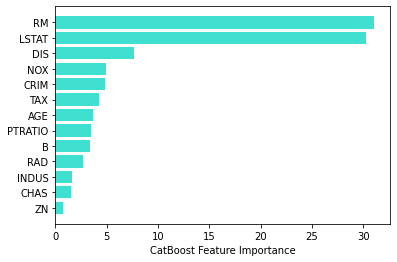

In [12]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(boston_d.feature_names[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

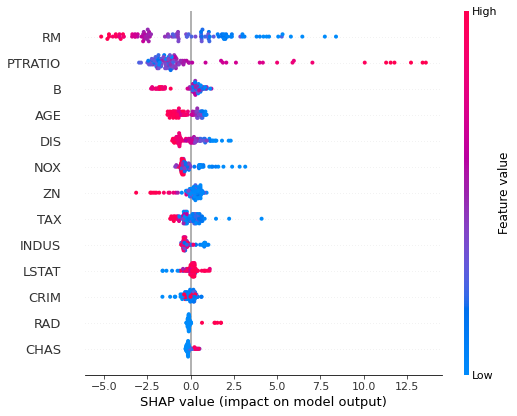

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = boston_d.feature_names[sorted_feature_importance])

In [14]:
pred_cat = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_cat)))
r2 = r2_score(y_test, pred_cat)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 2.83
R2: 0.90


In [16]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor(loss_function='RMSE')
grid = {"max_depth": [10,30,50],
        "min_child_weight" : [1,3,6],
        "n_estimators": [200],
        "learning_rate": [0.05, 0.1,0.16]}
xgb_grid = GridSearchCV(model,
                        grid,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:    5.5s finished


[10:18:36] WARNING: ..\src\learner.cc:573: 
Parameters: { "loss_function" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, loss_function='RMSE',
                                    max_delta_step=None, max_depth=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_meth

In [17]:
pred = xgb_grid.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 3.41
R2: 0.85


In [18]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, loss_function='RMSE', max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
model = xgb_grid.best_estimator_
explainer = shap.TreeExplainer(model)

In [20]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
212,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


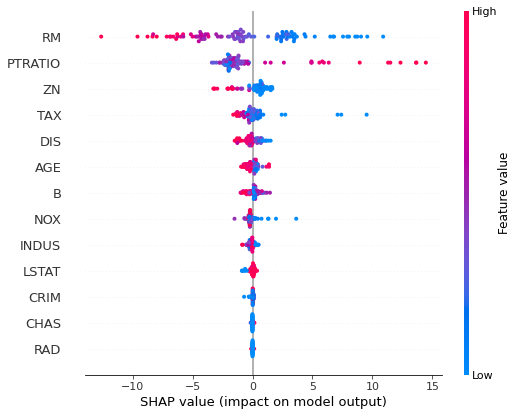

In [21]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = boston_d.feature_names[sorted_feature_importance])

In [22]:
pd.DataFrame(boston_d.data, columns=boston_d.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
import pandas as pd
# rooms per dwelling (RM) and the percentage of the lower status of the population (LSTAT)
henry = pd.DataFrame({'CRIM'   : [0.00632],
                       'ZN'     : [18.0],
                       'INDUS'   : [2.31],
                       'CHAS': [0.0],
                       'NOX'    : [0.538],
                       'RM'   : [6.575],
                       'AGE'   : [65.2],
                     'DIS':[4.0900],
                     'RAD':[1.0],
                     'TAX':[296.0],
                     'PTRATIO':[15.3],
                     'B':[396.90],
                     'LSTAT':[4.98]},
                      index = ['henry'])

import dalex as dx
titanic_rf_exp = dx.Explainer(model, boston_f, boston_t, 
                    label = "Boston RF Pipeline")

Preparation of a new explainer is initiated

  -> data              : 506 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 506 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : Boston RF Pipeline
  -> predict function  : <function yhat_default at 0x000002B30573C5E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.0, mean = 22.5, max = 50.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -15.4, mean = 0.000101, max = 13.5
  -> model_info        : package xgboost

A new explainer has been created!


In [25]:
boston_t.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [31]:
cp_henry = titanic_rf_exp.predict_profile(henry)
cp_henry.result

Calculating ceteris paribus: 100%|████████████████████████████████████████████████████| 13/13 [00:00<00:00, 213.21it/s]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,_original_,_yhat_,_vname_,_ids_,_label_
henry,0.006320,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.9800,0.00632,24.000187,CRIM,henry,Boston RF Pipeline
henry,0.896019,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.9800,0.00632,25.525944,CRIM,henry,Boston RF Pipeline
henry,1.785718,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.9800,0.00632,25.519880,CRIM,henry,Boston RF Pipeline
henry,2.675416,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.9800,0.00632,25.519880,CRIM,henry,Boston RF Pipeline
henry,3.565115,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.9800,0.00632,25.519880,CRIM,henry,Boston RF Pipeline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
henry,0.006320,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,36.5204,4.98000,17.149281,LSTAT,henry,Boston RF Pipeline
henry,0.006320,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,36.8828,4.98000,17.149281,LSTAT,henry,Boston RF Pipeline
henry,0.006320,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,37.2452,4.98000,17.149281,LSTAT,henry,Boston RF Pipeline
henry,0.006320,18,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,37.6076,4.98000,17.149281,LSTAT,henry,Boston RF Pipeline


In [33]:
cp_henry2 = titanic_lr_exp.predict_profile(henry)
cp_henry.plot(cp_henry2, variables = ['age', 'fare'])

NameError: name 'titanic_lr_exp' is not defined

Text(0.5, 1.0, 'Comparison between different modelling for regression problem')

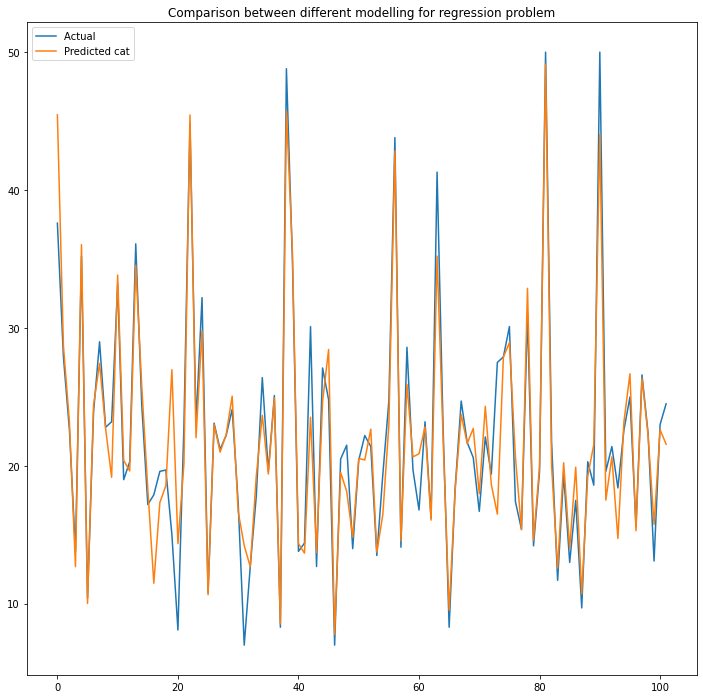

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(y_test, label='Actual ')
# plt.plot(pred, label='Predicted xgboost')
plt.plot(pred_cat, label='Predicted cat')
plt.legend()
plt.title('Comparison between different modelling for regression problem')

AttributeError: Feature importance is not defined for Booster type None